<a href="https://colab.research.google.com/github/MayaHayat/Ex4_DiscreteVsContinuous/blob/main/Question_1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import cvxpy
import numpy as np
import matplotlib.pyplot as plt
import doctest

# Discrete

In [ ]:
def egalitarian_allocation(valuations):
    """
    Examples:
    >>> valuations = [[11, 11, 22, 33, 44], [11, 22, 44, 55, 66], [11, 33, 22, 11, 66]]
    >>> execution_time, num_resources = egalitarian_allocation(valuations)
    player 0 gets:  item 0 (11), item 4 (44),
    player 1 gets:  item 3 (55),
    player 2 gets:  item 1 (33), item 2 (22),


    >>> valuations = [[11, 11, 11, 11, 11], [11, 11, 11, 11, 11], [11, 11, 11, 11, 11]]
    >>> execution_time, num_resources = egalitarian_allocation(valuations)
    player 0 gets:  item 3 (11), item 4 (11),
    player 1 gets:  item 0 (11), item 2 (11),
    player 2 gets:  item 1 (11),

    >>> valuations = [[22, 11, 11, 11, 11], [11, 11, 11, 11, 11], [11, 11, 11, 11, 11]]
    >>> execution_time, num_resources = egalitarian_allocation(valuations)
    player 0 gets:  item 0 (22),
    player 1 gets:  item 1 (11), item 2 (11),
    player 2 gets:  item 3 (11), item 4 (11),
    """
    num_agents = len(valuations)
    num_resources = len(valuations[0])
    variables = []
    utilities = []

    for i in range(num_agents):
        utility = 0
        for j in range(num_resources):
            variables.append(cvxpy.Variable(num_agents, integer=True))
            utility += variables[j][i] * valuations[i][j]
        utilities.append(utility)

    min_utility = cvxpy.Variable()

    fixed_constraints = [
        variables[i][j] >= 0 for i in range(num_resources) for j in range(num_agents)
    ] + [
        variables[i][j] <= 1 for i in range(num_resources) for j in range(num_agents)
    ] + [
        utilities[i] >= min_utility for i in range(num_agents)
    ] + [
        sum(variables[i]) == 1 for i in range(num_resources)
    ]

    prob = cvxpy.Problem(cvxpy.Maximize(min_utility), constraints=fixed_constraints)
    start_time = time.time()
    prob.solve(solver=cvxpy.GLPK_MI)
    end_time = time.time()
    execution_time = end_time - start_time

    for i in range(num_agents):
        print(f"player {i} gets: ", end=" ")
        for j in range(num_resources):
            if variables[j][i].value > 0:
                print(f"item {j} ({round(variables[j][i].value) * valuations[i][j]}), ", end="")
        print()

    return execution_time, num_resources

if __name__ == "__main__":
    import doctest
    doctest.testmod()



PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.10/doctest.py", line 1501, in run
    sys.settrace(save_trace)



# Continuous

In [ ]:

# Continuous
def egalitarian_allocation_continuous(valuations: list[list[float]]):
    # Declare the variables and utility
    num_of_players = len(valuations)
    num_of_resources = len(valuations[0])
    variables = []
    utility_for_player = []

    # Calculation of the utility for all player
    for i in range(num_of_players):
        utility = 0
        for j in range(num_of_resources):
            variables.append(cvxpy.Variable(num_of_players))  # fractions of all the resources by number of player
            utility += variables[j][i] * valuations[i][j]  # Calculation of the utility for player i
        utility_for_player.append(utility)  # insert  utility for player i to utility list

    min_utility = cvxpy.Variable()

    # list all the constraints for the maximize function
    fixed_constraints = \
        [variables[i][j] >= 0 for i in range(num_of_resources) for j in range(num_of_players)] + \
        [variables[i][j] <= 1 for i in range(num_of_resources) for j in range(num_of_players)] + \
        [utility_for_player[i] >= min_utility for i in range(num_of_players)] + \
        [sum(variables[i]) == 1 for i in range(num_of_resources)]

    # solve the equation
    prob = cvxpy.Problem(cvxpy.Maximize(min_utility), constraints=fixed_constraints)
    start_time = time.time()
    prob.solve(solver=cvxpy.ECOS)
    end_time = time.time()
    execution_time = end_time - start_time
    print("Execution time:", execution_time)

    # print the result
    for i in range(num_of_players):
        print(f"player {i} receives ", end=" ")
        for j in range(num_of_resources):
            if j == 0:
                print(f"{abs(round(variables[j][i].value * 100, 2))}% of resource {j}", end="")
            else:
                print(f" and {abs(round(variables[j][i].value * 100, 2))}% of resource {j}", end="")
        print()

    return execution_time, num_of_resources


In [ ]:
execution_times_discrete = []
num_resources_list_discrete = []


def run_discrete(valuations: list[list[float]]):
  execution_time, num_resources = egalitarian_allocation(valuations)
  execution_times_discrete.append(execution_time)
  num_resources_list_discrete.append(num_resources)


In [ ]:
execution_times_continuous = []
num_resources_list_continuous = []


def run_continuous(valuations: list[list[float]]):
  execution_time, num_resources = egalitarian_allocation_continuous(valuations)
  execution_times_continuous.append(execution_time)
  num_resources_list_continuous.append(num_resources)


In [ ]:

# Set a seed for reproducibility
np.random.seed(42)

# Create three arrays of changing sizes with random numbers
array1 = np.random.rand(100)
array2 = np.random.rand(100)
array3 = np.random.rand(100)

valuations=[array1, array2, array3]

In [ ]:
run_discrete(valuations)

print("time: ", execution_times_discrete)
print("number: ", num_resources_list_discrete)

time:  [0.07171821594238281, 0.06940007209777832, 0.09813857078552246, 0.28099966049194336, 0.24066734313964844, 0.47152137756347656, 0.5893921852111816, 1.665102481842041, 1.598802089691162, 2.7173538208007812]
number:  [5, 10, 20, 30, 40, 50, 60, 70, 90, 100]


In [ ]:
run_continuous(valuations)

print("time: ", execution_times_continuous)
print("number: ", num_resources_list_continuous)

time:  [0.029811620712280273, 0.047356605529785156, 0.08641505241394043, 0.13392186164855957, 0.19307875633239746, 0.2040541172027588, 0.36585068702697754, 0.5180809497833252, 0.503997802734375, 0.509319543838501]
number:  [5, 10, 20, 30, 40, 50, 60, 70, 90, 100]


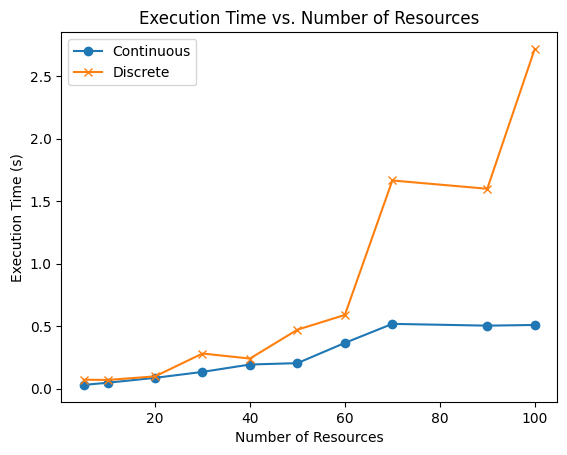

In [ ]:
# Plot continuous data
plt.plot(num_resources_list_continuous, execution_times_continuous, label='Continuous', marker='o')

# Plot discrete data
plt.plot(num_resources_list_discrete, execution_times_discrete, label='Discrete', marker='x')

plt.xlabel('Number of Resources')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs. Number of Resources')
plt.legend()

plt.show()
